In [4]:
import numpy as np
import matplotlib.pyplot as plt

The equation is fairly well defined for 2-Body Simulation. It is merely just an application of Newton's laws leading to the following calculation of gravitational force betwen the two bodies;
$$ F = G\frac{m_1 m_2}{r^2} $$
Where F is the gravitational force, m_1 and m_2 are the masses of the objects and r is the distance between the two objects.

One would imagine that the accelation will then be;
$$ A_i = \frac{F}{m_i} $$ 
I think

In [5]:
class Object:
    def __init__(self,mass,location,velocity):
        self.mass = mass
        self.location = location
        self.velocity = velocity
    def updateVelocity(self,velocity):
        self.velocity = velocity
    def getMass(self):
        return self.mass
    def getLocation(self):
        return self.location
    def getVelocity(self):
        return self.velocity
    

In [6]:
A = Object(1,np.array([0,0,0]),np.array([0.01,0.01,0.01]))

In [4]:
B = Object(2,np.array([0.5,0.5]),np.array([-0.01,0.003])) 

In [8]:
G = 6.67408e-11

In [6]:
G

6.67408e-11

In [7]:
Force_Direction = np.linalg.norm(A.getLocation()-B.getLocation())
Force_Direction

0.7071067811865476

In [8]:
F = Force_Direction*G*(A.getMass()*B.getMass()/np.linalg.norm(A.getLocation()-B.getLocation())**2)

In [9]:
A_Acc = F/A.getMass()
A_Acc

1.8877148904726048e-10

In [10]:
B_Acc = F/B.getMass()
B_Acc

9.438574452363024e-11

In [11]:
A.getVelocity() + A_Acc

array([0.01, 0.01])

The below works but I'm not too happy with the Force_Direction method

In [88]:
hmmm = []
hmmm2 = []
Avelocity = np.array([0,0,0])
Aposition = np.array([0,0,0])
Bposition = np.array([10,5,3])
Bvelocity = np.array([0,0,0])
for i in range(20000):
    timestep = 0.01
    A = Object(20000000000,Aposition,Avelocity)
    B = Object(0.00000001,Bposition,Bvelocity) 
    Force_Direction = (A.getLocation()-B.getLocation())/np.linalg.norm(A.getLocation()-B.getLocation())
    F = Force_Direction*G*(A.getMass()*B.getMass()/np.linalg.norm(A.getLocation()-B.getLocation())**2)
    A_Acc = F/A.getMass()
    B_Acc = F/B.getMass()
    A_Update = A.getVelocity()+A_Acc*timestep
    B_Update = B.getVelocity()+B_Acc*timestep
    Avelocity = A_Update
    Bvelocity = B_Update
    print(Bvelocity)
    Aposition = Aposition + Avelocity
    Bposition = Bposition + Bvelocity
    hmmm.append(Aposition)
    hmmm2.append(Bposition)

[-8.60526415e-05 -4.30263208e-05 -2.58157925e-05]
[-1.72106764e-04 -8.60533820e-05 -5.16320292e-05]
[-2.58163849e-04 -1.29081924e-04 -7.74491546e-05]
[-0.00034423 -0.00017211 -0.00010327]
[-0.00043029 -0.00021515 -0.00012909]
[-0.00051637 -0.00025818 -0.00015491]
[-0.00060245 -0.00030123 -0.00018074]
[-0.00068855 -0.00034427 -0.00020656]
[-0.00077465 -0.00038733 -0.0002324 ]
[-0.00086077 -0.00043039 -0.00025823]
[-0.00094691 -0.00047345 -0.00028407]
[-0.00103306 -0.00051653 -0.00030992]
[-0.00111922 -0.00055961 -0.00033577]
[-0.00120541 -0.00060271 -0.00036162]
[-0.00129162 -0.00064581 -0.00038749]
[-0.00137785 -0.00068893 -0.00041336]
[-0.00146411 -0.00073205 -0.00043923]
[-0.00155038 -0.00077519 -0.00046512]
[-0.00163669 -0.00081835 -0.00049101]
[-0.00172303 -0.00086151 -0.00051691]
[-0.00180939 -0.0009047  -0.00054282]
[-0.00189579 -0.00094789 -0.00056874]
[-0.00198222 -0.00099111 -0.00059466]
[-0.00206868 -0.00103434 -0.0006206 ]
[-0.00215518 -0.00107759 -0.00064655]
[-0.00224171 -

[-0.78764772 -0.39382386 -0.23629431]
[-0.78764768 -0.39382384 -0.2362943 ]
[-0.78764764 -0.39382382 -0.23629429]
[-0.7876476  -0.3938238  -0.23629428]
[-0.78764756 -0.39382378 -0.23629427]
[-0.78764753 -0.39382376 -0.23629426]
[-0.78764749 -0.39382375 -0.23629425]
[-0.78764745 -0.39382373 -0.23629424]
[-0.78764742 -0.39382371 -0.23629422]
[-0.78764738 -0.39382369 -0.23629421]
[-0.78764734 -0.39382367 -0.2362942 ]
[-0.78764731 -0.39382365 -0.23629419]
[-0.78764727 -0.39382363 -0.23629418]
[-0.78764723 -0.39382362 -0.23629417]
[-0.7876472  -0.3938236  -0.23629416]
[-0.78764716 -0.39382358 -0.23629415]
[-0.78764712 -0.39382356 -0.23629414]
[-0.78764709 -0.39382354 -0.23629413]
[-0.78764705 -0.39382353 -0.23629412]
[-0.78764702 -0.39382351 -0.2362941 ]
[-0.78764698 -0.39382349 -0.23629409]
[-0.78764695 -0.39382347 -0.23629408]
[-0.78764691 -0.39382345 -0.23629407]
[-0.78764687 -0.39382344 -0.23629406]
[-0.78764684 -0.39382342 -0.23629405]
[-0.7876468  -0.3938234  -0.23629404]
[-0.78764677

[-0.78763343 -0.39381672 -0.23629003]
[-0.78763342 -0.39381671 -0.23629003]
[-0.78763342 -0.39381671 -0.23629003]
[-0.78763341 -0.39381671 -0.23629002]
[-0.78763341 -0.3938167  -0.23629002]
[-0.7876334  -0.3938167  -0.23629002]
[-0.7876334  -0.3938167  -0.23629002]
[-0.78763339 -0.3938167  -0.23629002]
[-0.78763339 -0.39381669 -0.23629002]
[-0.78763338 -0.39381669 -0.23629001]
[-0.78763338 -0.39381669 -0.23629001]
[-0.78763337 -0.39381669 -0.23629001]
[-0.78763337 -0.39381668 -0.23629001]
[-0.78763336 -0.39381668 -0.23629001]
[-0.78763336 -0.39381668 -0.23629001]
[-0.78763335 -0.39381667 -0.23629   ]
[-0.78763334 -0.39381667 -0.23629   ]
[-0.78763334 -0.39381667 -0.23629   ]
[-0.78763333 -0.39381667 -0.23629   ]
[-0.78763333 -0.39381666 -0.23629   ]
[-0.78763332 -0.39381666 -0.23629   ]
[-0.78763332 -0.39381666 -0.23629   ]
[-0.78763331 -0.39381666 -0.23628999]
[-0.78763331 -0.39381665 -0.23628999]
[-0.7876333  -0.39381665 -0.23628999]
[-0.7876333  -0.39381665 -0.23628999]
[-0.78763329

[-0.78762997 -0.39381498 -0.23628899]
[-0.78762997 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762996 -0.39381498 -0.23628899]
[-0.78762995 -0.39381498 -0.23628899]
[-0.78762995 -0.39381498 -0.23628899]
[-0.78762995 -0.39381497 -0.23628898]
[-0.78762995 -0.39381497 -0.23628898]
[-0.78762995 -0.39381497 -0.23628898]
[-0.78762994 -0.39381497 -0.23628898]
[-0.78762994 -0.39381497 -0.23628898]
[-0.78762994 -0.39381497 -0.23628898]
[-0.78762994 -0.39381497 -0.23628898]
[-0.78762994 -0.39381497 -0.23628898]
[-0.78762993 -0.39381497 -0.23628898]
[-0.78762993 -0.39381497 -0.23628898]
[-0.78762993 -0.39381497 -0.23628898]
[-0.78762993 -0.39381496 -0.23628898]
[-0.78762993 -0.39381496 -0.23628898]
[-0.78762992 -0.39381496 -0.23628898]
[-0.78762992 -0.39381496 -0.23628898]
[-0.78762992 -0.39381496 -0.23628898]
[-0.78762992

[-0.78762855 -0.39381428 -0.23628857]
[-0.78762855 -0.39381428 -0.23628857]
[-0.78762855 -0.39381428 -0.23628857]
[-0.78762855 -0.39381427 -0.23628856]
[-0.78762855 -0.39381427 -0.23628856]
[-0.78762855 -0.39381427 -0.23628856]
[-0.78762855 -0.39381427 -0.23628856]
[-0.78762855 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762854 -0.39381427 -0.23628856]
[-0.78762853 -0.39381427 -0.23628856]
[-0.78762853 -0.39381427 -0.23628856]
[-0.78762853 -0.39381427 -0.23628856]
[-0.78762853 -0.39381427 -0.23628856]
[-0.78762853 -0.39381427 -0.23628856]
[-0.78762853 -0.39381426 -0.23628856]
[-0.78762853 -0.39381426 -0.23628856]
[-0.78762853 -0.39381426 -0.23628856]
[-0.78762853

[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381389 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762777 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776 -0.39381388 -0.23628833]
[-0.78762776

[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762728 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727 -0.39381364 -0.23628818]
[-0.78762727

[-0.7876269  -0.39381345 -0.23628807]
[-0.7876269  -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381345 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689 -0.39381344 -0.23628807]
[-0.78762689

[-0.78762663 -0.39381331 -0.23628799]
[-0.78762663 -0.39381331 -0.23628799]
[-0.78762663 -0.39381331 -0.23628799]
[-0.78762663 -0.39381331 -0.23628799]
[-0.78762663 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662 -0.39381331 -0.23628799]
[-0.78762662

[-0.78762642 -0.39381321 -0.23628792]
[-0.78762642 -0.39381321 -0.23628792]
[-0.78762642 -0.39381321 -0.23628792]
[-0.78762642 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641 -0.39381321 -0.23628792]
[-0.78762641

[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624 -0.39381312 -0.23628787]
[-0.78762624

[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261  -0.39381305 -0.23628783]
[-0.7876261 

[-0.78762599 -0.393813   -0.2362878 ]
[-0.78762599 -0.393813   -0.2362878 ]
[-0.78762599 -0.393813   -0.2362878 ]
[-0.78762599 -0.393813   -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599 -0.39381299 -0.2362878 ]
[-0.78762599

[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589 -0.39381295 -0.23628777]
[-0.78762589

[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581 -0.3938129  -0.23628774]
[-0.78762581

[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762574 -0.39381287 -0.23628772]
[-0.78762573

[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762568 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567 -0.39381284 -0.2362877 ]
[-0.78762567

[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562 -0.39381281 -0.23628769]
[-0.78762562

[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558 -0.39381279 -0.23628767]
[-0.78762558

[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553 -0.39381277 -0.23628766]
[-0.78762553

[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255  -0.39381275 -0.23628765]
[-0.7876255 

In [89]:
np.array(hmmm2)[:,0]

array([ 9.99991395e+00,  9.99974184e+00,  9.99948368e+00, ...,
       -1.54532396e+04, -1.54540273e+04, -1.54548149e+04])

<IPython.core.display.Javascript object>


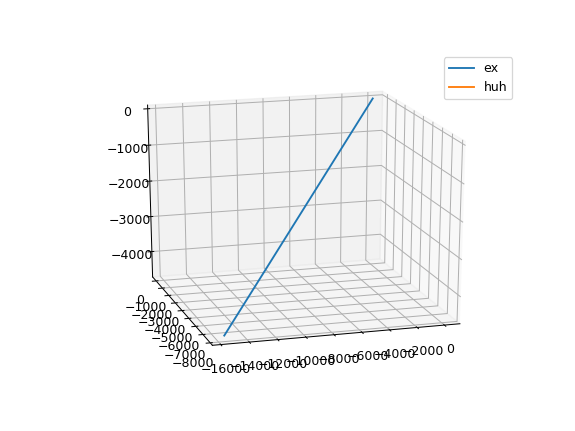

In [90]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.array(hmmm2)[:,0],np.array(hmmm2)[:,1],np.array(hmmm2)[:,2],label='ex')
ax.plot(np.array(hmmm)[:,0],np.array(hmmm)[:,1],np.array(hmmm)[:,2],label='huh')
plt.legend()

In [ ]:
plot(np.)